<table>
    <tr>
        <th><img src="img/rqc.png" href="http://www.rqc.ru/" width="150px"></th>
        <th colspan="3" align="left" style="font-weight:normal">
            <p>• Yaroslav Kharkov <a href="mailto:y.kharkov@unsw.edu.au">y.kharkov@unsw.edu.au</a>, Anton Karazeev <a href="mailto:a.karazeev@rqc.ru">a.karazeev@rqc.ru</a>
            <p>• Based on <a href="https://www.nature.com/articles/s41567-018-0048-5">Neural-network quantum state tomography</a> paper</p>
            <p>• The latest version of this notebook is available <a href="https://github.com/RQC-QApp/NNQST">here</a></p>
        </th>
    </tr>
</table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

from nnqst import rbm_qst, utils, paper_functions, generators,\
    state_operations, state_representations, fidelities

## RBM Quantum State Tomography

In [3]:
num_units = 3
num_hidd = 5
num_samples = 3000

states = generators.get_all_states(num_units, "tuple")
phases_sampled = 0.1 * generators.random_phases(len(states))
# phases_sampled = generators.random_phases(len(states))
# phases_sampled = np.array([2.62022653e-01, 4.52593227e-01, 7.18638172e-05, 1.89961158e-01])
# phases_sampled = [1.4, 0.9, 0.3, 2.7]

# Filling dicts.
amplitudes, phases = {}, {}
for i in range(len(states)):
    amplitudes[states[i]] = 1. / np.sqrt(len(states))
    phases[states[i]] = phases_sampled[i]

print('> amplitudes:', amplitudes)
print("> phases:", phases)
print(' ')

dataset = generators.generate_Isinglike_dataset(num_units, states, amplitudes, phases, num_samples)

psi_true = dict()
for state in states:
    psi_true[state] = amplitudes[state] * np.exp(1j * phases[state])

print('> psi_true: ', psi_true)
print(' ')
print('> dataset:', dataset)

> amplitudes: {(0, 0, 0): 0.35355339059327373, (0, 0, 1): 0.35355339059327373, (0, 1, 0): 0.35355339059327373, (0, 1, 1): 0.35355339059327373, (1, 0, 0): 0.35355339059327373, (1, 0, 1): 0.35355339059327373, (1, 1, 0): 0.35355339059327373, (1, 1, 1): 0.35355339059327373}
> phases: {(0, 0, 0): 0.3330969396363222, (0, 0, 1): 0.42196469903207634, (0, 1, 0): 0.3444365060154882, (0, 1, 1): 0.4955395019692798, (1, 0, 0): 0.2615012692925742, (1, 0, 1): 0.17520928723018325, (1, 1, 0): 0.15987039400062872, (1, 1, 1): 0.017923185647844148}
 
> psi_true:  {(0, 0, 0): (0.33412006920977533+0.1156018137887764j), (0, 0, 1): (0.32254182686843336+0.14479906740160156j), (0, 1, 0): (0.3327877415496058+0.1193830770013605j), (0, 1, 1): (0.3110252668621818+0.16811687414804194j), (1, 0, 0): (0.3415336155067642+0.09140453751799055j), (1, 0, 1): (0.3481405160182859+0.061629385089595014j), (1, 1, 0): (0.3490448507730122+0.056282254297829834j), (1, 1, 1): (0.3534966042646774+0.006336463788425215j)}
 
> dataset: {

## (1/2) Amplitudes.

In [4]:
dataset_Z = generators.generate_dataset(states, ['I' * num_units], amplitudes, phases, num_samples)

quantum_basis = states
r_qst = rbm_qst.RBM_QST(quantum_basis, num_units, num_hidd)
r_qst.train_amplitudes(dataset_Z, max_epochs=1000, learning_rate=0.9, debug=True, precise=True)

Epoch 0: objective is 2.0794048360427606
Epoch 500: objective is 2.0791105811831225


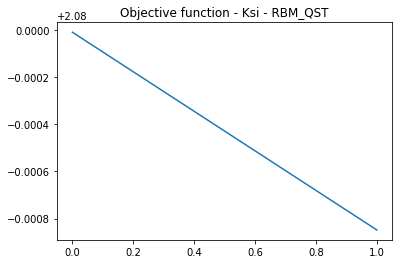

In [12]:
plt.plot(r_qst.objectives)
plt.title('Objective function - Ksi - RBM_QST')
plt.show()

In [13]:
# Fidelity.
fid, sampled_from_RBM = fidelities.fidelity_RBM(r_qst, psi_true, num_samples=2000)
fid

0.965261801918288

In [14]:
sampled_from_RBM

{(0, 0, 0): 0.3442382895611701,
 (0, 0, 1): 0.3721558813185679,
 (0, 1, 0): 0.3714835124201342,
 (0, 1, 1): 0.33763886032268264,
 (1, 0, 0): 0.3456877203488721,
 (1, 0, 1): 0.35986108430893166,
 (1, 1, 0): 0.33763886032268264,
 (1, 1, 1): 0.35777087639996635}

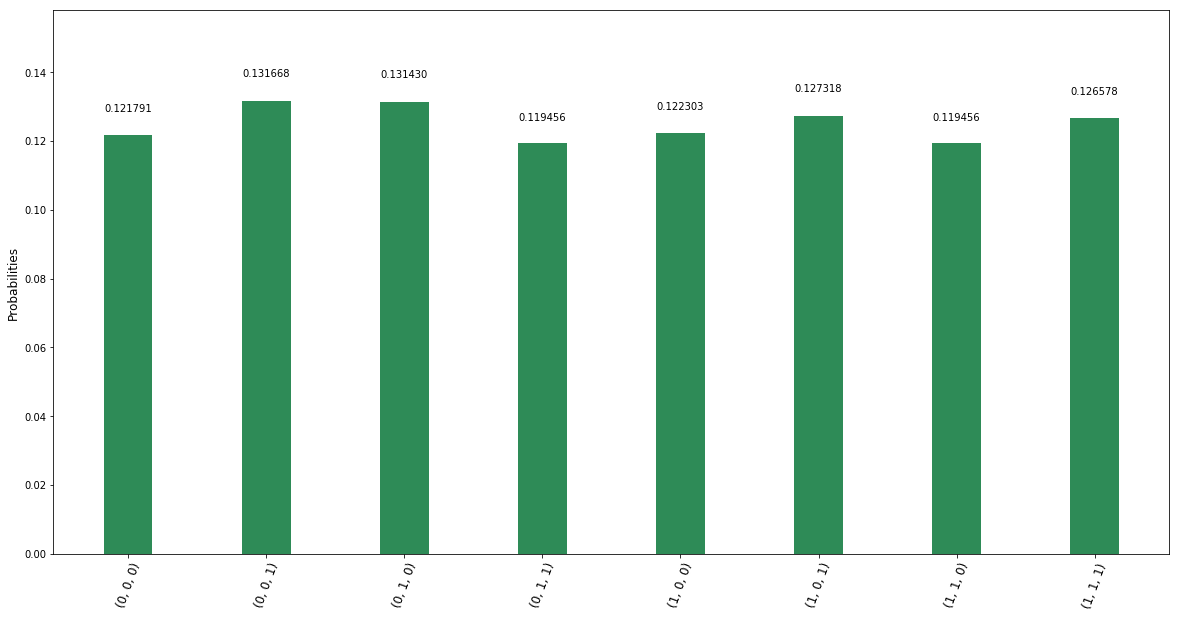

In [15]:
utils.plot_histogram(sampled_from_RBM)

In [16]:
print(r_qst.weights_lambda)

[[ 0.00000000e+00 -1.58523346e-04 -7.55715050e-04  1.97814004e-05
  -1.74544588e-05  2.87840087e-04]
 [-2.77516364e-02  9.47705009e-03 -1.87178107e-01  2.59064397e-03
   1.38105914e-01  5.57585823e-03]
 [ 1.78398498e-03 -6.71569343e-03 -3.04342990e-01  3.09932270e-02
   1.53958590e-01  9.46862988e-02]
 [ 1.01991370e-02 -2.71709788e-02  3.45578464e-01 -1.97589573e-03
  -2.02942142e-01 -8.24335487e-02]]


## (2/2) Phases.

In [17]:
basis_set = generators.generate_Isinglike_basis_set(num_units)
print('> basis_set:', basis_set)

print('> dataset:', dataset)

> basis_set: ['HII', 'IHI', 'IIH', 'KII', 'IKI', 'IIK']
> dataset: {'HII': {(0, 0, 0): 728, (0, 0, 1): 711, (0, 1, 0): 765, (1, 0, 0): 66, (0, 1, 1): 707, (1, 1, 1): 16, (1, 0, 1): 7}, 'IHI': {(1, 0, 1): 761, (0, 0, 1): 726, (0, 0, 0): 745, (1, 0, 0): 715, (0, 1, 0): 14, (1, 1, 0): 14, (1, 1, 1): 15, (0, 1, 1): 10}, 'IIH': {(0, 1, 0): 701, (1, 0, 0): 754, (1, 1, 0): 736, (0, 0, 0): 729, (1, 1, 1): 29, (0, 0, 1): 36, (1, 0, 1): 15}, 'KII': {(1, 1, 1): 498, (0, 1, 1): 269, (1, 1, 0): 385, (1, 0, 0): 586, (0, 1, 0): 368, (0, 0, 1): 425, (0, 0, 0): 174, (1, 0, 1): 295}, 'IKI': {(1, 1, 1): 517, (1, 0, 1): 289, (0, 1, 1): 269, (1, 1, 0): 202, (0, 0, 1): 440, (0, 1, 0): 477, (0, 0, 0): 307, (1, 0, 0): 499}, 'IIK': {(0, 1, 0): 392, (1, 1, 0): 275, (0, 0, 1): 500, (1, 0, 1): 262, (1, 1, 1): 528, (0, 1, 1): 381, (1, 0, 0): 450, (0, 0, 0): 212}}


In [18]:
r_qst.train_phases(dataset, basis_set=basis_set, max_epochs=1000,
                   learning_rate=0.05, debug=True, precise=True)

Epoch 0: objective is 1.8073065694871393
Epoch 500: objective is 1.7941539830842177


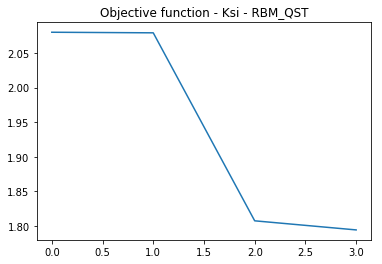

In [19]:
plt.plot(r_qst.objectives)
plt.title('Objective function - Ksi - RBM_QST')
plt.show()

In [20]:
# Fidelity.
fid = fidelities.fidelity_RBM_PRECISE(r_qst, psi_true)
print('precise:', fid)

fid, sampled_from_RBM = fidelities.fidelity_RBM(r_qst, psi_true, num_samples=2000)
print('sampled:', fid)

precise: 0.9680686923125497
sampled: 0.9653941899827476


In [21]:
r_qst.weights_mu

array([[ 0.        ,  0.00104339,  0.00138924, -0.00090831, -0.00155708,
         0.00117347],
       [-0.21334504, -0.16024739, -0.14154463, -0.10329868, -0.11858577,
        -0.14111308],
       [-0.11217218, -0.03554093, -0.12031879, -0.09294066, -0.07821012,
        -0.0627253 ],
       [-0.20029887, -0.04962397, -0.1446602 , -0.09916181, -0.08901934,
        -0.179273  ]])

In [22]:
# Phases
psi_rbm_lst = list(utils.psi_RBM(r_qst).values())
psi_true_lst = list(psi_true)
print(psi_true_lst)
phases_RBM = np.log(psi_rbm_lst).imag
phases_true = np.array(list(phases.values()))
print(phases_RBM%np.pi)
print(phases_true%np.pi)
print(np.array(phases_true - phases_RBM)%(2*np.pi))

[(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]
[1.7331536  1.49711646 1.58177555 1.3515404  1.46589532 1.23912429
 1.32080122 1.09976481]
[0.60081334 0.16356638 0.36871755 0.39583889 0.00945487 0.30776065
 0.35950504 0.04272303]
[5.15084504 4.94963522 5.0701273  5.3274838  4.82674485 5.35182167
 5.32188913 5.22614353]


In [23]:
phases_true

array([0.60081334, 0.16356638, 0.36871755, 0.39583889, 0.00945487,
       0.30776065, 0.35950504, 0.04272303])

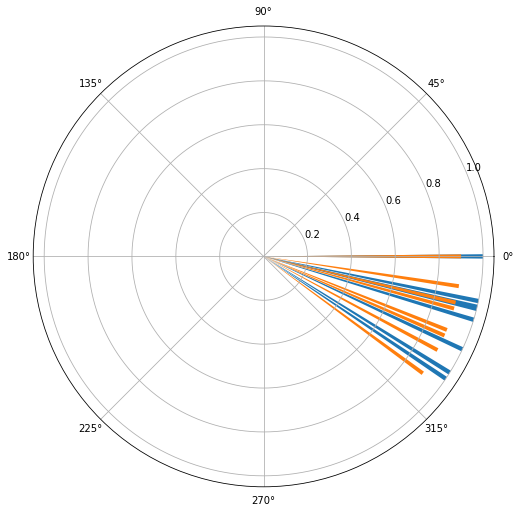

In [28]:
radii = np.ones(8)
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], polar=True)
ax.bar(phases_true - phases_true[0], radii, width=0.02, bottom=0.0)
ax.bar(phases_RBM - phases_RBM[0], radii * 0.9, width=0.02, bottom=0.0)
plt.show()

# Classical RBM

In [82]:
from nnqst import rbm_classic

whole_dataset = list()
for state in dataset_Z['III']:
    [whole_dataset.append(list(state)) for _ in range(dataset_Z['III'][state])]
whole_dataset = np.array(whole_dataset)

In [83]:
r_cls = rbm_classic.RBM(3, 2)
r_cls.train(whole_dataset, max_epochs=1000, learning_rate=0.5, debug=True)

Epoch 0: objective is 2.087141038232443
Epoch 100: objective is 2.102008860003788
Epoch 200: objective is 2.1382270315367258
Epoch 300: objective is 2.124637497062402
Epoch 400: objective is 2.100501744680939
Epoch 500: objective is 2.094660885242749
Epoch 600: objective is 2.0954110350471837
Epoch 700: objective is 2.0941696719955942
Epoch 800: objective is 2.095021931520454
Epoch 900: objective is 2.0947946205760983


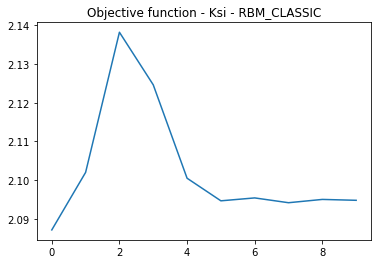

In [84]:
plt.plot(r_cls.objectives)
plt.title('Objective function - Ksi - RBM_CLASSIC')
plt.show()

In [85]:
whole_dataset_tuples = [tuple(x) for x in whole_dataset]
fid, states = fidelities.fidelity_RBM(r_cls, state_representations.into_dict(whole_dataset_tuples))
fid

0.9958908882882903

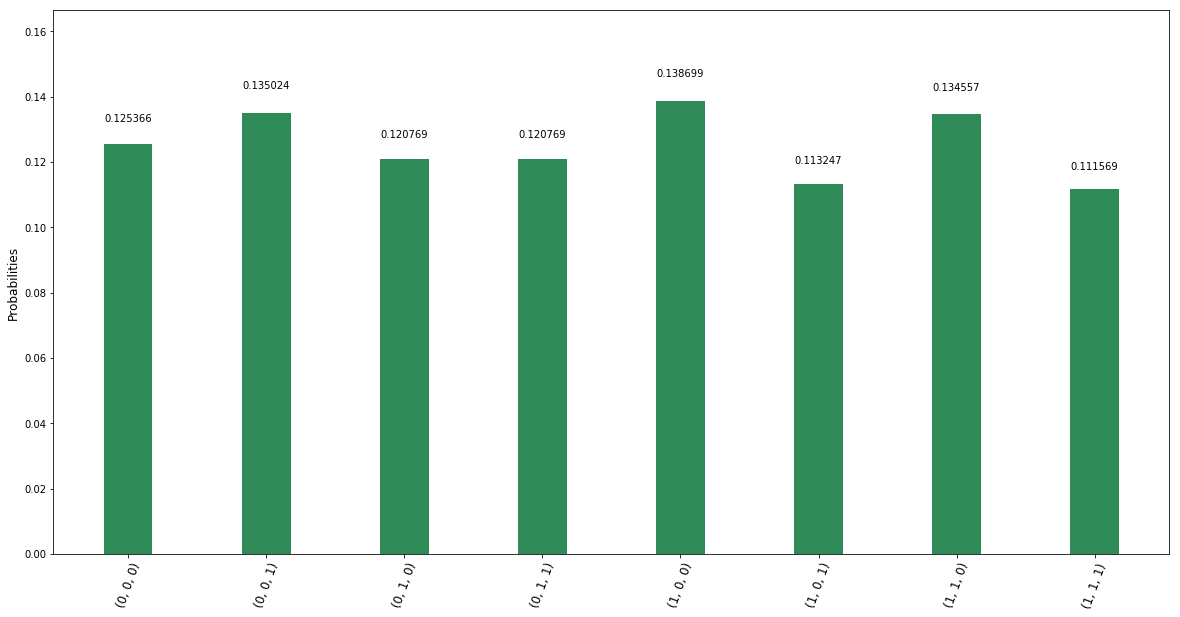

In [86]:
utils.plot_histogram(states)